First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values in the dataset:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class 

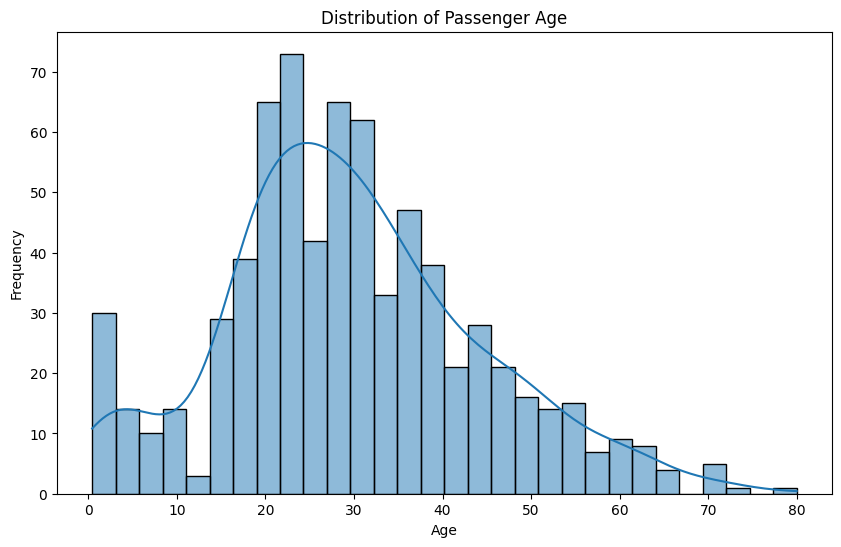

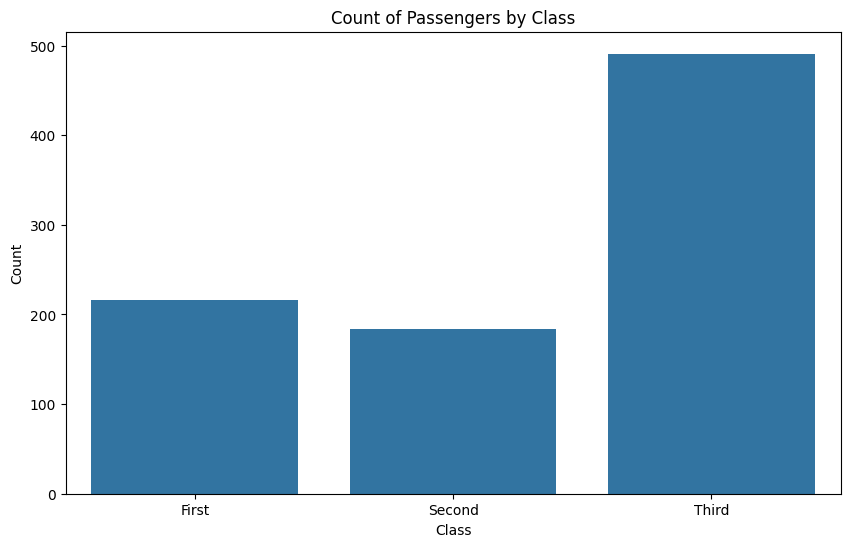

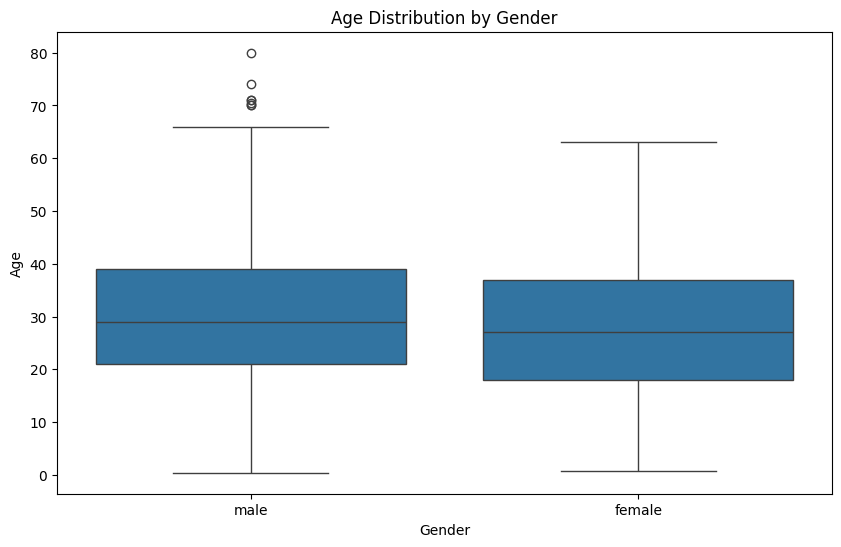

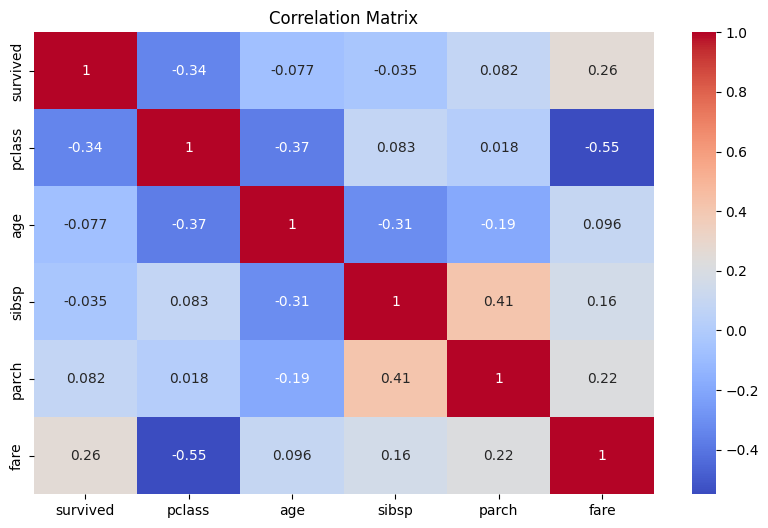

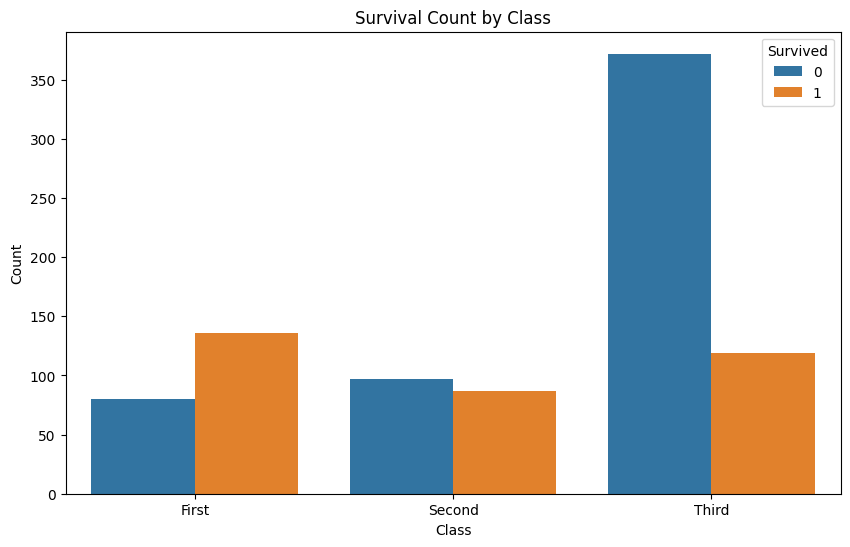

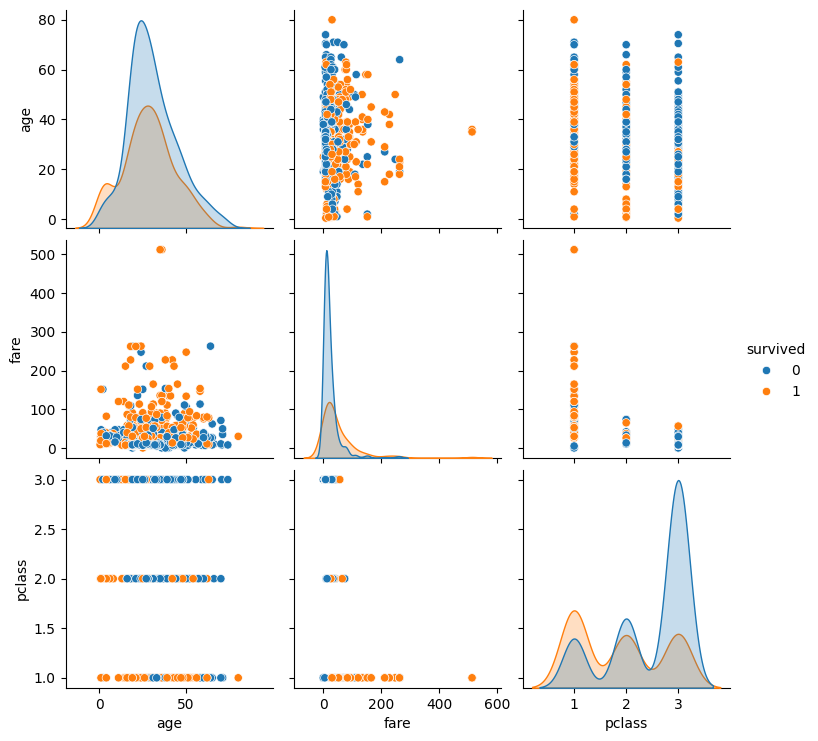

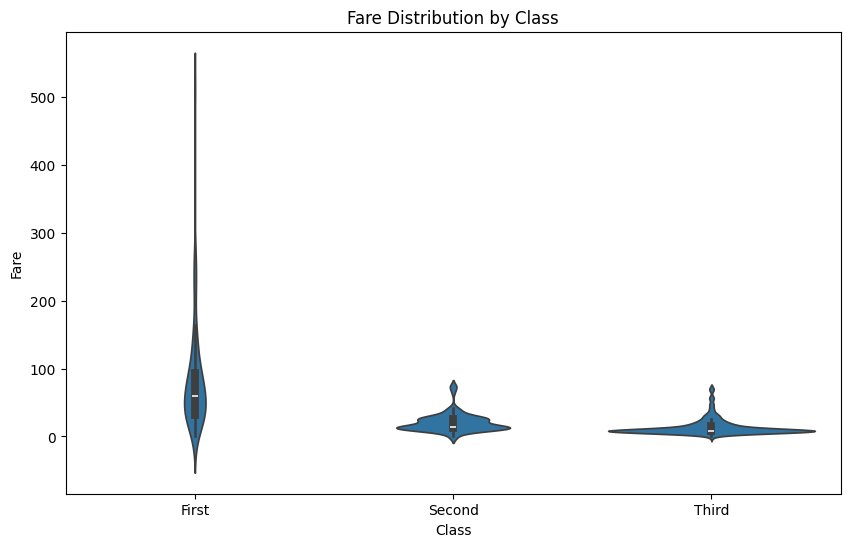

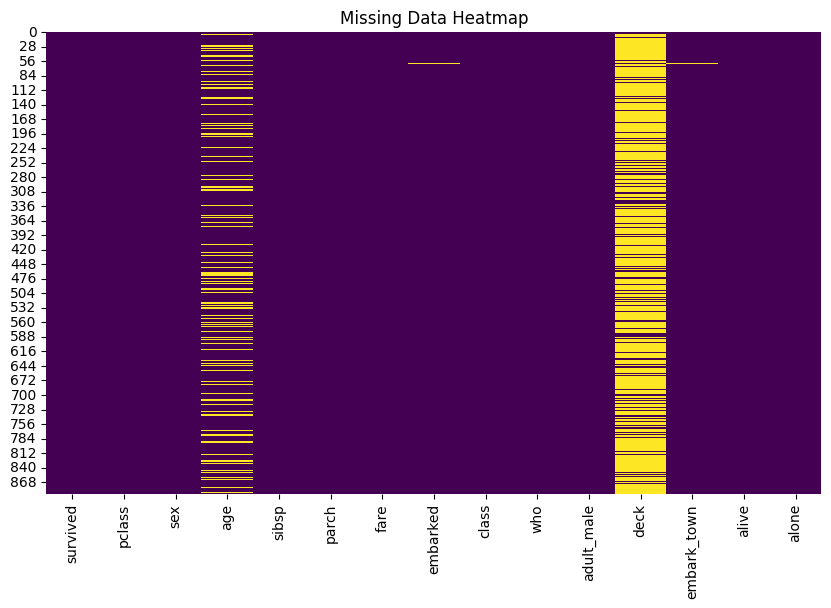

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')

print("First 5 rows of the dataset:")
print(df.head())

print("\nMissing values in the dataset:")
print(df.isnull().sum())

print("\nSummary statistics of the dataset:")
print(df.describe(include='all'))

print("\nData types of each column:")
print(df.dtypes)

print("\nUnique values for categorical columns:")
for col in df.select_dtypes(include='category').columns:
    print(f"{col}: {df[col].nunique()} unique values")

print("\nUnique values for 'embarked' column:")
print(df['embarked'].unique())

print("\nUnique values for 'class' column:")
print(df['class'].unique())

# Fix for observed argument issue
print("\nMean survival rate by class:")
print(df.groupby('class', observed=True)['survived'].mean())

print("\nAverage fare by class and gender:")
print(df.groupby(['class', 'sex'], observed=True)['fare'].mean())

# Ensure we only pass numeric columns to the correlation function
numeric_df = df.select_dtypes(include='number')

print("\nCorrelation between numeric columns:")
print(numeric_df.corr())

plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='class', data=df)
plt.title('Count of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='sex', y='age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='class', hue='survived', data=df)
plt.title('Survival Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

sns.pairplot(df[['age', 'fare', 'pclass', 'survived']].dropna(), hue='survived', kind='scatter')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='class', y='fare', data=df)
plt.title('Fare Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()
